# 🎨 Neural Style Transfer Interactive Notebook

Welcome to the Neural Style Transfer interactive notebook! This notebook provides a comprehensive implementation of neural style transfer using the pre-trained model from the deepeshdm/Neural-Style-Transfer repository.

## What is Neural Style Transfer?

Neural Style Transfer (NST) is a technique that takes two images — a **content image** and a **style image** — and blends them together so that the resulting output image retains the core elements of the content image, but appears to be "painted" in the style of the style reference image.

## How it works

The technique uses deep neural networks to:
1. Extract content features from the content image
2. Extract style features from the style image  
3. Generate a new image that combines both features

Let's get started! 🚀

## 1. Import Required Libraries

First, let's import all the necessary libraries for our neural style transfer implementation.

In [5]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = False

print("📚 Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"TensorFlow Hub version: {hub.__version__}")

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("🚀 GPU detected and available for acceleration!")
else:
    print("💻 Running on CPU mode")

📚 Libraries imported successfully!
TensorFlow version: 2.20.0
TensorFlow Hub version: 0.16.1
💻 Running on CPU mode


## 2. Load the Pre-trained Model

We'll use the pre-trained Arbitrary Neural Artistic Stylization Network from TensorFlow Hub. This model is already downloaded in the `model` directory.

In [8]:
# Define model path
model_path = r"model"

# Load the pre-trained model
print("🔄 Loading the pre-trained Neural Style Transfer model...")
print("This may take a moment on first load...")

try:
    # Load the model from TensorFlow Hub
    hub_model = hub.load(model_path)
    print("✅ Model loaded successfully!")
    print("📋 Model ready for style transfer operations")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Make sure the model directory exists and contains the saved model files.")

🔄 Loading the pre-trained Neural Style Transfer model...
This may take a moment on first load...
✅ Model loaded successfully!
📋 Model ready for style transfer operations
✅ Model loaded successfully!
📋 Model ready for style transfer operations


## 3. Image Processing Functions

Let's create helper functions to load, preprocess, and display images.

In [9]:
def load_and_preprocess_image(image_path, max_dim=512):
    """
    Load and preprocess an image for neural style transfer.
    
    Args:
        image_path (str): Path to the image file
        max_dim (int): Maximum dimension for the image
    
    Returns:
        tf.Tensor: Preprocessed image tensor
    """
    # Load the image
    image = plt.imread(image_path)
    
    # Convert to float32 and normalize to [0, 1]
    image = image.astype(np.float32)
    
    # Add batch dimension
    image = image[np.newaxis, ...]
    
    # Normalize if values are in [0, 255] range
    if image.max() > 1.0:
        image = image / 255.0
    
    return image

def resize_image(image, target_size=(256, 256)):
    """
    Resize image to target size.
    
    Args:
        image: Input image tensor
        target_size: Target dimensions (height, width)
    
    Returns:
        Resized image tensor
    """
    return tf.image.resize(image, target_size)

def display_images(images, titles, figsize=(15, 5)):
    """
    Display multiple images side by side.
    
    Args:
        images: List of images to display
        titles: List of titles for each image
        figsize: Figure size tuple
    """
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    
    for i, (image, title) in enumerate(zip(images, titles)):
        if len(images) == 1:
            ax = axes
        else:
            ax = axes[i]
            
        # Remove batch dimension if present
        if len(image.shape) == 4:
            image = image[0]
            
        # Clip values to [0, 1] range
        image = np.clip(image, 0, 1)
        
        ax.imshow(image)
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def save_image(image, filename):
    """
    Save an image tensor to a file.
    
    Args:
        image: Image tensor to save
        filename: Output filename
    """
    # Remove batch dimension if present
    if len(image.shape) == 4:
        image = image[0]
    
    # Clip values to [0, 1] range
    image = np.clip(image, 0, 1)
    
    # Save the image
    plt.imsave(filename, image)
    print(f"💾 Image saved as: {filename}")

print("🔧 Image processing functions defined successfully!")

🔧 Image processing functions defined successfully!


## 4. Style Transfer Function

Now let's create our main style transfer function that uses the pre-trained model.

In [11]:
def neural_style_transfer(content_image_path, style_image_path, output_filename=None):
    """
    Perform neural style transfer on the given content and style images.
    
    Args:
        content_image_path (str): Path to the content image
        style_image_path (str): Path to the style image
        output_filename (str): Optional filename to save the result
    
    Returns:
        np.ndarray: Stylized image
    """
    
    print("🖼️ Loading and preprocessing images...")
    
    # Load and preprocess images
    content_image = load_and_preprocess_image(content_image_path)
    style_image = load_and_preprocess_image(style_image_path)
    
    # Resize style image to recommended size (256x256)
    style_image = resize_image(style_image, (256, 256))
    
    print(f"📐 Content image shape: {content_image.shape}")
    print(f"📐 Style image shape: {style_image.shape}")
    
    print("🎨 Applying neural style transfer...")
    
    # Apply style transfer using the pre-trained model
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
    
    # Convert to numpy array
    stylized_image = stylized_image.numpy()
    
    # Display results
    images = [content_image[0], style_image[0], stylized_image[0]]
    titles = ['Content Image', 'Style Image', 'Stylized Result']
    display_images(images, titles, figsize=(18, 6))
    
    # Save result if filename provided
    if output_filename:
        save_image(stylized_image, output_filename)
    
    print("✅ Style transfer completed successfully!")
    return stylized_image[0]

print("🎯 Neural style transfer function ready!")

🎯 Neural style transfer function ready!


## 5. Explore Available Sample Images

Let's see what sample images are available in the `Imgs` folder for experimentation.

📁 Available sample images:
🖼️ Content images:
   • content1.jpg
   • content2.jpg
   • content3.jpg
   • content4.jpg

🎨 Other images (can be used as style images):
   • final_oss.png
   • nst architecture.jpg
   • nst.png

📊 Total images available: 11

👀 Preview of sample content images:


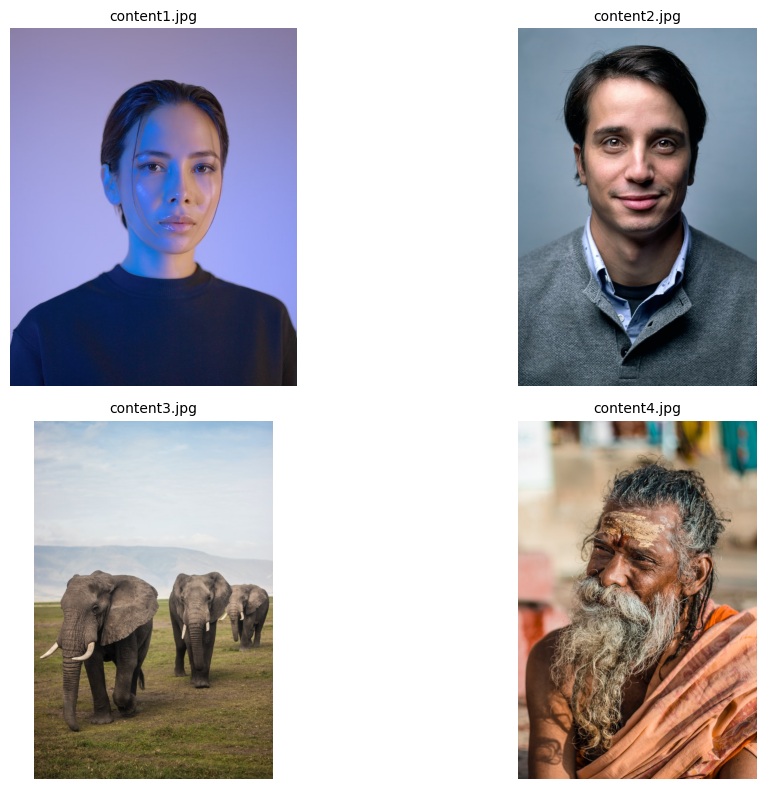

In [12]:
# List available sample images
imgs_folder = "Imgs"
if os.path.exists(imgs_folder):
    image_files = [f for f in os.listdir(imgs_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    print("📁 Available sample images:")
    print("=" * 40)
    
    content_images = [f for f in image_files if f.startswith('content')]
    other_images = [f for f in image_files if not f.startswith('content') and not f.startswith('art')]
    
    if content_images:
        print("🖼️ Content images:")
        for img in sorted(content_images):
            print(f"   • {img}")
    
    if other_images:
        print("\n🎨 Other images (can be used as style images):")
        for img in sorted(other_images):
            print(f"   • {img}")
            
    print(f"\n📊 Total images available: {len(image_files)}")
    
    # Display a grid of sample images
    sample_images = content_images[:4] if len(content_images) >= 4 else content_images
    
    if sample_images:
        print("\n👀 Preview of sample content images:")
        
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.flatten()
        
        for i, img_file in enumerate(sample_images):
            if i < 4:
                img_path = os.path.join(imgs_folder, img_file)
                img = plt.imread(img_path)
                axes[i].imshow(img)
                axes[i].set_title(img_file, fontsize=10)
                axes[i].axis('off')
        
        # Hide unused subplots
        for i in range(len(sample_images), 4):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
else:
    print("❌ Imgs folder not found. Please make sure you're running this from the correct directory.")

## 6. Example 1: Basic Style Transfer

Let's run our first style transfer example using the sample images.

🚀 Running Example 1: Basic Style Transfer
🖼️ Loading and preprocessing images...
📐 Content image shape: (1, 800, 640, 3)
📐 Style image shape: (1, 256, 256, 3)
🎨 Applying neural style transfer...


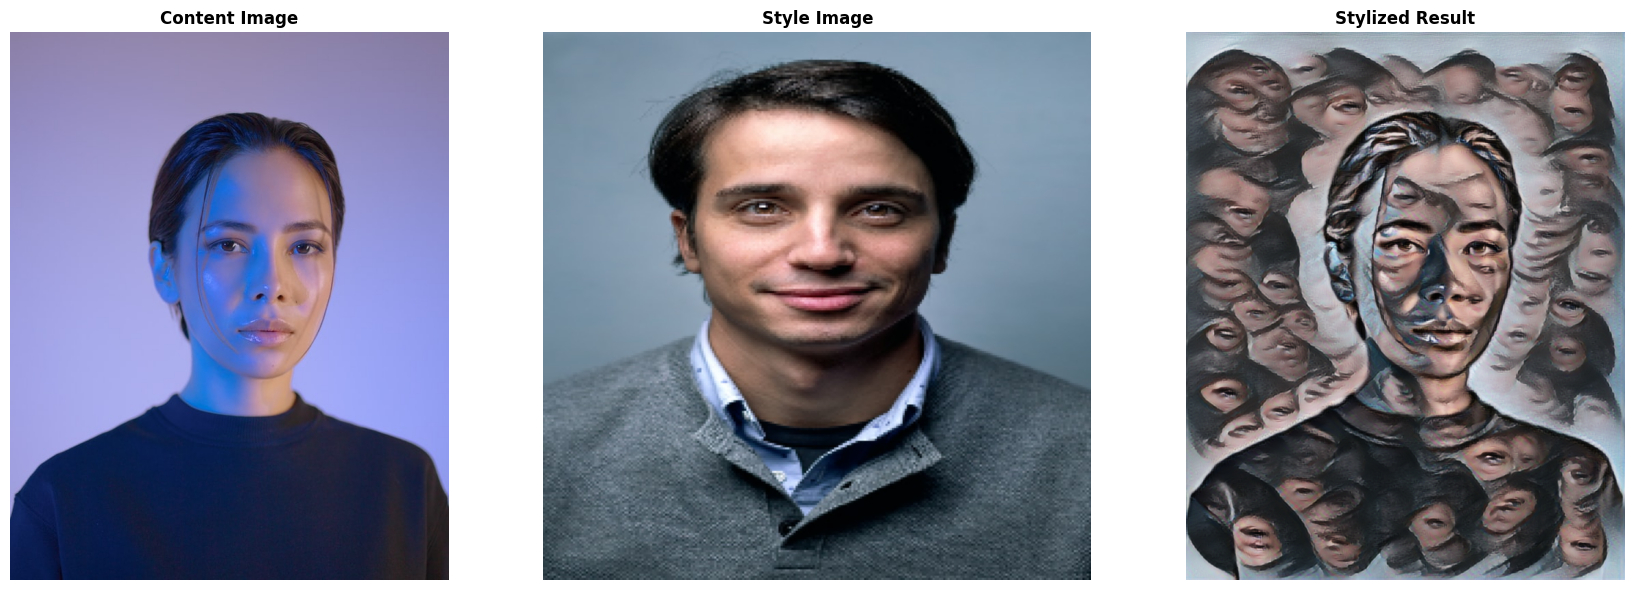

💾 Image saved as: example1_stylized.jpg
✅ Style transfer completed successfully!


In [13]:
# Example 1: Basic style transfer
content_image_path = os.path.join("Imgs", "content1.jpg")
style_image_path = os.path.join("Imgs", "content2.jpg")

print("🚀 Running Example 1: Basic Style Transfer")
print("=" * 50)

# Perform style transfer
result1 = neural_style_transfer(
    content_image_path=content_image_path,
    style_image_path=style_image_path,
    output_filename="example1_stylized.jpg"
)

## 7. Example 2: Different Style Combination

Let's try another combination with different content and style images.

🚀 Running Example 2: Different Style Combination
🖼️ Loading and preprocessing images...
📐 Content image shape: (1, 960, 640, 3)
📐 Style image shape: (1, 256, 256, 3)
🎨 Applying neural style transfer...


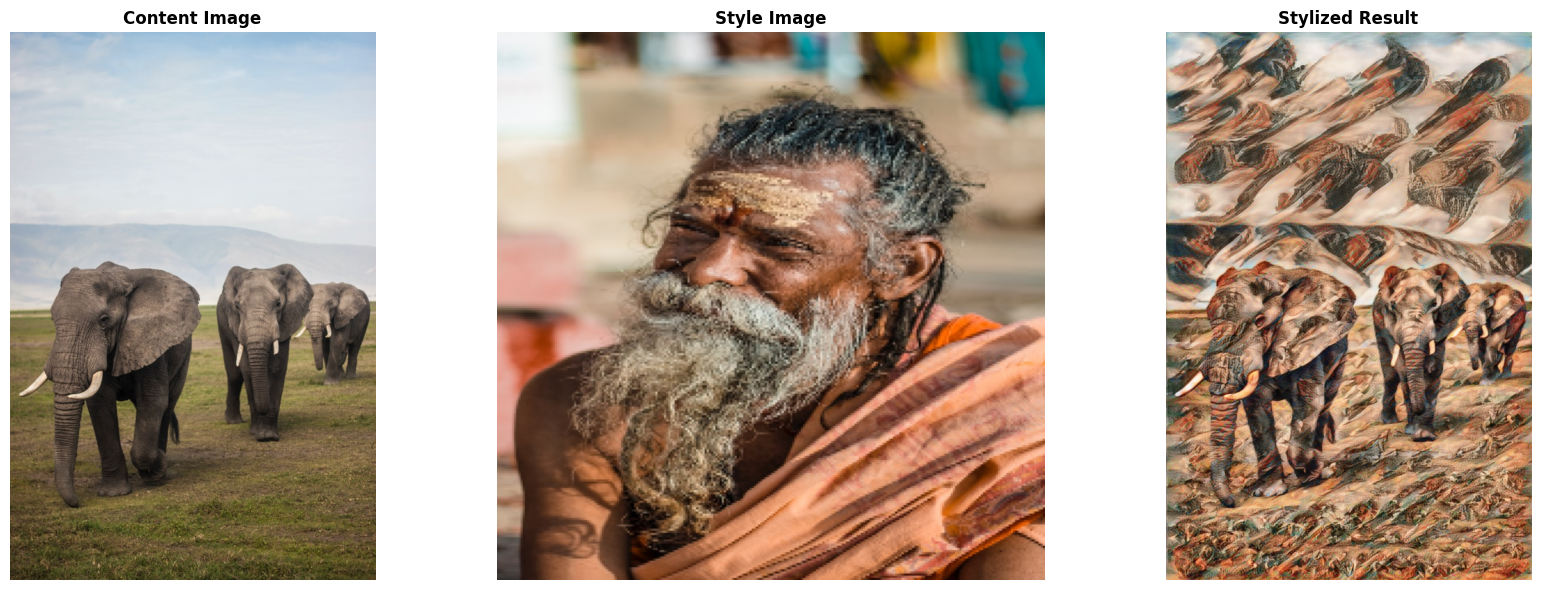

💾 Image saved as: example2_stylized.jpg
✅ Style transfer completed successfully!


In [16]:
# Example 2: Different style combination
content_image_path = os.path.join("Imgs", "content3.jpg")
style_image_path = os.path.join("Imgs", "content4.jpg")

print("🚀 Running Example 2: Different Style Combination")
print("=" * 50)

# Perform style transfer
result2 = neural_style_transfer(
    content_image_path=content_image_path,
    style_image_path=style_image_path,
    output_filename="example2_stylized.jpg"
)

## 8. Custom Image Style Transfer

Now you can try with your own images! Simply replace the paths below with your own image files.

**Requirements:**
- Images should be in `.jpg`, `.jpeg`, or `.png` format
- For best results, style images should be around 256x256 pixels
- Content images can be any reasonable size

🎨 Custom Style Transfer Example
Content image: Imgs\content1.jpg
Style image: Imgs\content3.jpg
🖼️ Loading and preprocessing images...
📐 Content image shape: (1, 800, 640, 3)
📐 Style image shape: (1, 256, 256, 3)
🎨 Applying neural style transfer...


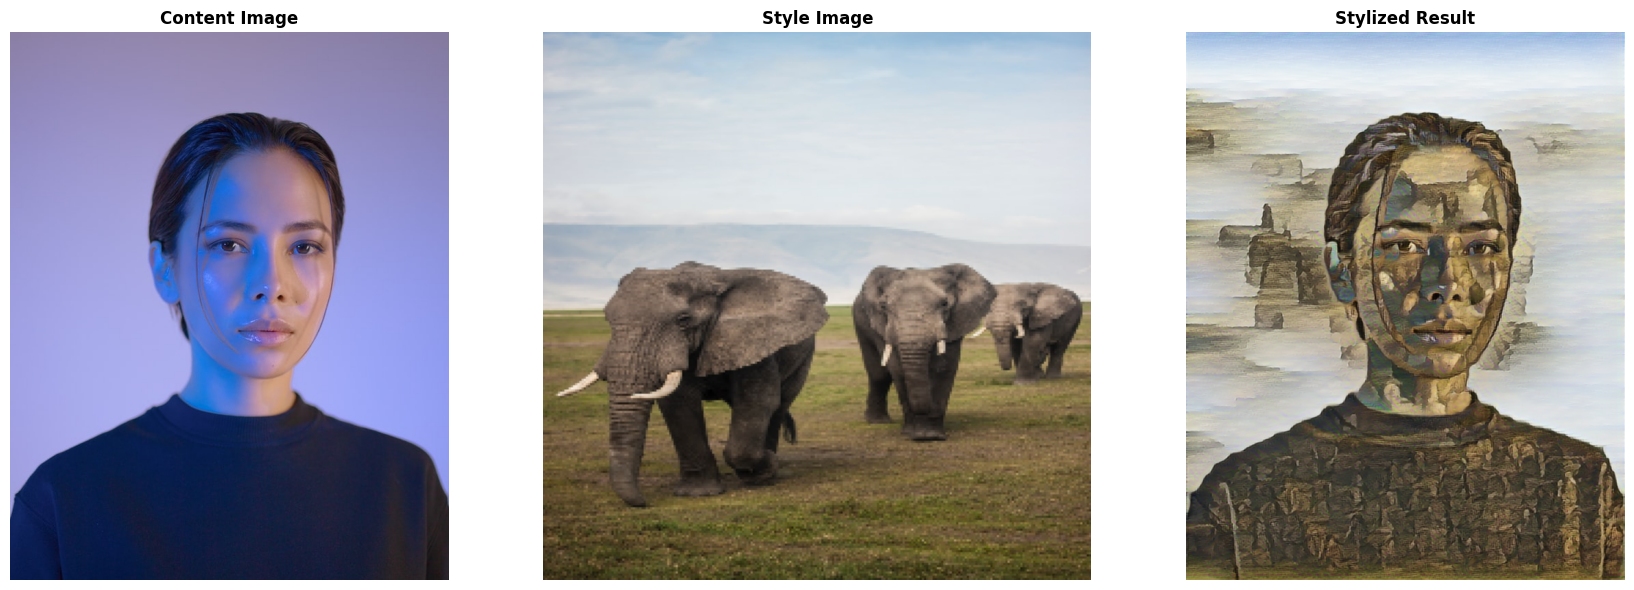

💾 Image saved as: custom_stylized.jpg
✅ Style transfer completed successfully!


In [14]:
# Custom image style transfer
# Replace these paths with your own images!

# Example using sample images (modify these paths)
my_content_image = os.path.join("Imgs", "content1.jpg")  # Replace with your content image path
my_style_image = os.path.join("Imgs", "content3.jpg")    # Replace with your style image path

print("🎨 Custom Style Transfer Example")
print("=" * 40)
print(f"Content image: {my_content_image}")
print(f"Style image: {my_style_image}")

# Check if files exist
if os.path.exists(my_content_image) and os.path.exists(my_style_image):
    # Perform custom style transfer
    custom_result = neural_style_transfer(
        content_image_path=my_content_image,
        style_image_path=my_style_image,
        output_filename="custom_stylized.jpg"
    )
else:
    print("❌ One or both image files not found. Please check the paths.")
    print("💡 Tip: Place your images in the project directory and update the paths above.")

## 9. Batch Processing Multiple Images

Let's create a function to process multiple images at once for comparison.

🚀 Running batch style transfer...
🔄 Processing 2 images with style: content4.jpg

📸 Processing image 1/2: content1.jpg
💾 Image saved as: batch_demo_1_stylized.jpg

📸 Processing image 2/2: content2.jpg
💾 Image saved as: batch_demo_1_stylized.jpg

📸 Processing image 2/2: content2.jpg
💾 Image saved as: batch_demo_2_stylized.jpg
💾 Image saved as: batch_demo_2_stylized.jpg


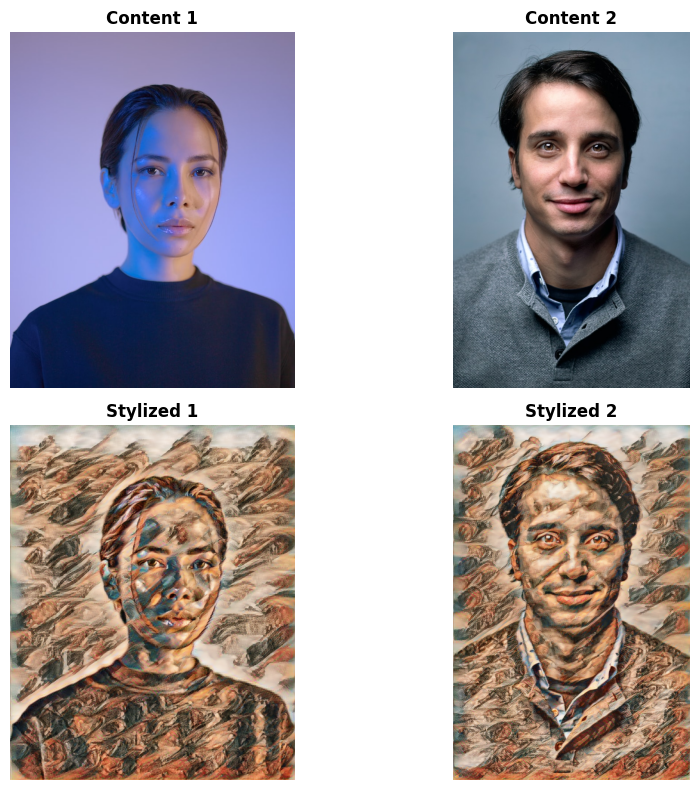

✅ Batch processing completed! Generated 2 stylized images.


In [15]:
def batch_style_transfer(content_images, style_image, output_prefix="batch"):
    """
    Apply the same style to multiple content images.
    
    Args:
        content_images (list): List of content image paths
        style_image (str): Path to the style image
        output_prefix (str): Prefix for output filenames
    """
    
    results = []
    
    print(f"🔄 Processing {len(content_images)} images with style: {os.path.basename(style_image)}")
    print("=" * 60)
    
    for i, content_img in enumerate(content_images, 1):
        print(f"\n📸 Processing image {i}/{len(content_images)}: {os.path.basename(content_img)}")
        
        if os.path.exists(content_img) and os.path.exists(style_image):
            try:
                # Load and preprocess images
                content = load_and_preprocess_image(content_img)
                style = load_and_preprocess_image(style_image)
                style = resize_image(style, (256, 256))
                
                # Apply style transfer
                stylized = hub_model(tf.constant(content), tf.constant(style))[0]
                stylized_np = stylized.numpy()[0]
                
                # Save result
                output_filename = f"{output_prefix}_{i}_stylized.jpg"
                save_image(stylized, output_filename)
                
                results.append({
                    'content': content[0],
                    'stylized': stylized_np,
                    'filename': output_filename
                })
                
            except Exception as e:
                print(f"❌ Error processing {content_img}: {str(e)}")
        else:
            print(f"❌ File not found: {content_img}")
    
    return results

# Example: Apply the same style to multiple content images
if os.path.exists("Imgs"):
    content_images = [
        os.path.join("Imgs", "content1.jpg"),
        os.path.join("Imgs", "content2.jpg"),
    ]
    
    style_image = os.path.join("Imgs", "content4.jpg")
    
    # Filter existing files
    existing_content = [img for img in content_images if os.path.exists(img)]
    
    if existing_content and os.path.exists(style_image):
        print("🚀 Running batch style transfer...")
        batch_results = batch_style_transfer(existing_content, style_image, "batch_demo")
        
        # Display results in a grid
        if batch_results:
            n_results = len(batch_results)
            fig, axes = plt.subplots(2, n_results, figsize=(5*n_results, 8))
            
            if n_results == 1:
                axes = axes.reshape(-1, 1)
            
            for i, result in enumerate(batch_results):
                # Original content
                axes[0, i].imshow(result['content'])
                axes[0, i].set_title(f'Content {i+1}', fontweight='bold')
                axes[0, i].axis('off')
                
                # Stylized result
                axes[1, i].imshow(np.clip(result['stylized'], 0, 1))
                axes[1, i].set_title(f'Stylized {i+1}', fontweight='bold')
                axes[1, i].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            print(f"✅ Batch processing completed! Generated {len(batch_results)} stylized images.")
    else:
        print("❌ Required images not found for batch processing.")

## 10. Tips and Best Practices

Here are some tips to get the best results from neural style transfer:

### 🎯 **Image Selection Tips:**
- **Content Images:** Choose images with clear subjects and good contrast
- **Style Images:** Art pieces, paintings, or images with distinctive textures work best
- **Resolution:** Higher resolution content images produce better details

### ⚡ **Performance Tips:**
- **Style Image Size:** Keep style images around 256x256 pixels for optimal speed
- **Content Image Size:** Large content images take longer but produce higher quality results
- **GPU Acceleration:** If available, GPU will significantly speed up processing

### 🎨 **Artistic Tips:**
- **Strong Styles:** Images with bold colors and patterns transfer better
- **Complementary Colors:** Consider color harmony between content and style
- **Texture vs Color:** Some styles transfer texture better, others transfer color schemes

### 🔧 **Technical Notes:**
- The model works best with `.jpg` and `.png` formats
- Images are automatically normalized to [0,1] range
- The pre-trained model was trained on ~80,000 paintings
- Style transfer is a one-pass operation (very fast compared to optimization-based methods)

## 🎉 Conclusion

Congratulations! You've successfully set up and used the Neural Style Transfer system. 

### What You've Learned:
- ✅ How to load and use pre-trained neural style transfer models
- ✅ Image preprocessing for deep learning applications  
- ✅ Running inference on TensorFlow Hub models
- ✅ Batch processing multiple images
- ✅ Best practices for artistic style transfer

### Next Steps:
1. **Experiment** with your own images
2. **Try different** content-style combinations
3. **Explore** the original research papers linked in the README
4. **Share** your creative results!

### Resources:
- **Original Repository:** https://github.com/deepeshdm/Neural-Style-Transfer
- **TensorFlow Hub Model:** https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2
- **Web Interface:** https://share.streamlit.io/deepeshdm/pixelmix/main/App.py

---

**Happy Creating! 🎨✨**